# **Doctor patient conversation dataset analysis and models**
 **-Swathi G
vatsalya
Thejaswi**

In [ ]:
import pandas as pd
import csv
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Skip problematic lines
data = pd.read_csv("gpt-4.csv", engine='python', on_bad_lines='skip')


In [ ]:
data.head(3000)

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
...,...,...
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."


In [ ]:
df = data.sample(n=1000)
df.isnull().sum()

,0
data,0
conversation,0


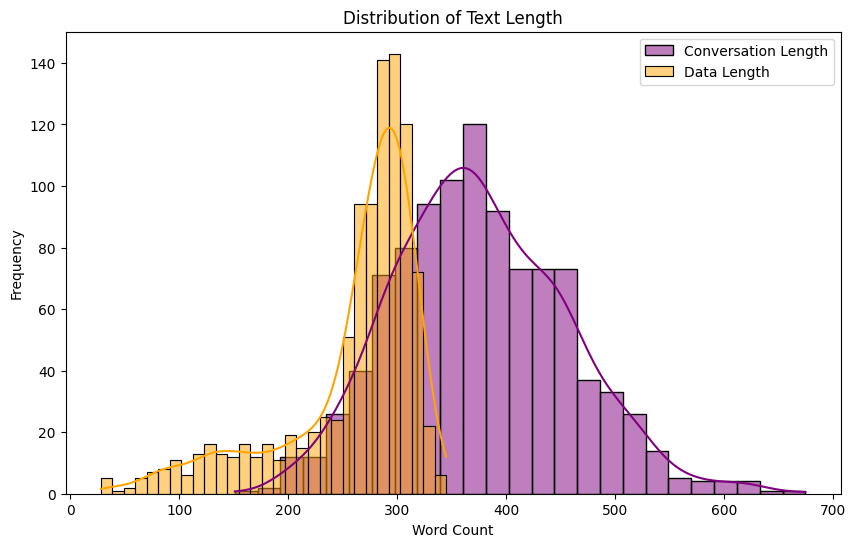

In [ ]:
# Text Length Analysis
df['conversation_length'] = df['conversation'].apply(lambda x: len(x.split()))  # Word count for conversation
df['data_length'] = df['data'].apply(lambda x: len(x.split()))  # Word count for data

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['conversation_length'], kde=True, color='purple', label='Conversation Length')
sns.histplot(df['data_length'], kde=True, color='orange', label='Data Length')
plt.legend()
plt.title('Distribution of Text Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

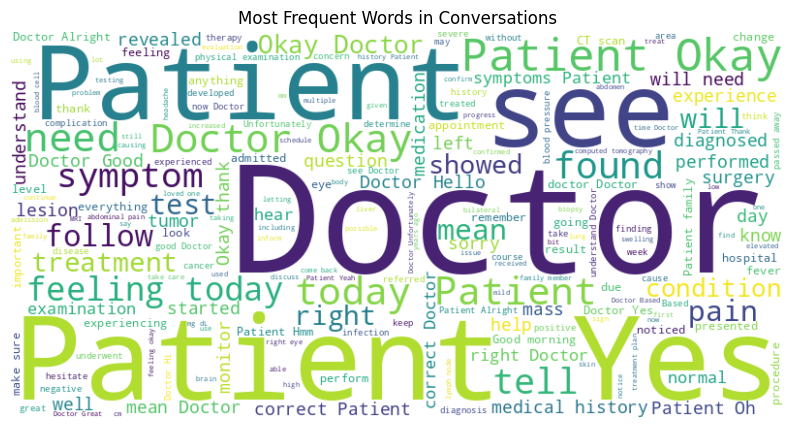

In [ ]:
# Word Cloud for Most Frequent Words in 'conversation'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['conversation'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

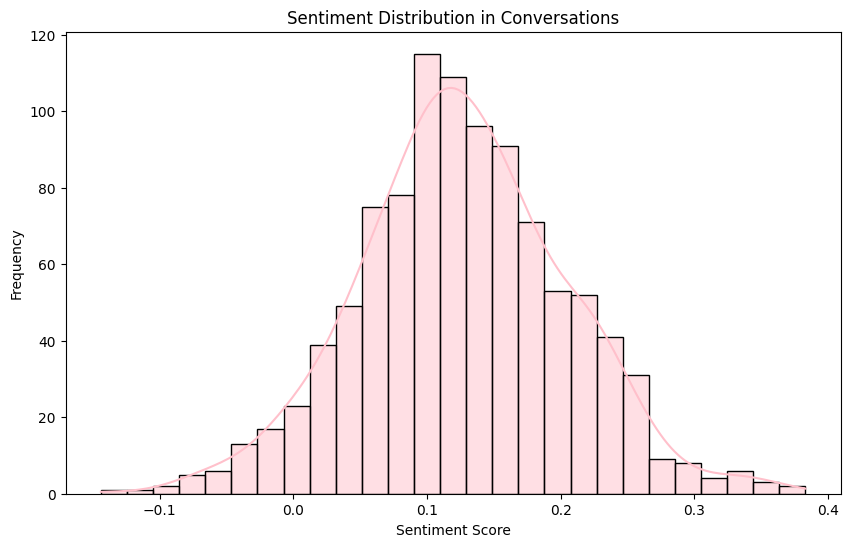

In [ ]:
from textblob import TextBlob
df['sentiment'] = df['conversation'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='pink')
plt.title('Sentiment Distribution in Conversations')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
most_positive_data = df.loc[df['sentiment'].idxmax()]['data']
most_negative_data = df.loc[df['sentiment'].idxmin()]['data']
print("\nMost Positive Data Sample:\n", most_positive_data)
print("\nMost Negative Data Sample:\n", most_negative_data)


Most Positive Data Sample:
 Another 34-year-old male patient who smoked visited the hospital with a history of fever, runny nose, and diarrhea for seven days. There was no complaint of shortness of breath or chest pains. The patient was tested for central nervous system (CNS) response and reflexes and was alert and conscious. Examination of clinical vitals parameters was performed and recorded as BP: 126/76; PR: 43; RR: 21/min; body temperature: 36.6°C; oxygen saturation (SpO2): 98%; CVS: S1+S2+0; chest bilateral vesicular breathing, and no lower limbs edema. EKG reports showed sinus bradycardia with a prolonged PR interval and QT interval; a U wave was observed in V1 (Figure ). Chest X-ray and chest CT showed unremarkable findings (Figures -). Echocardiography also revealed a normal echo study (Figure ). General clinical and blood parameters of the patients are provided in Table .
Patient 2 was suspected of COVID-19 due to a non-symptomatic fever. The nasal swab of Patient 2 was test

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

# **NLP-related preprocessing tasks**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Drop rows with missing conversations
df = df.dropna(subset=['conversation'])

def preprocess_with_nltk(text):
    # Fallback tokenization
    tokens = text.lower().split()

    # Lemmatize, remove stopwords, and keep only alphabetic tokens
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and word.isalpha()
    ]

    return " ".join(cleaned_tokens)


df['preprocessed_data'] = df['data'].apply(preprocess_with_nltk)
# Apply preprocessing and create a new column
df['preprocessed_conversation'] = df['conversation'].apply(preprocess_with_nltk)

# Set display options to avoid truncation
pd.set_option('display.max_colwidth', None)

print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head(5)

,data,conversation,conversation_length,data_length,sentiment,preprocessed_data,preprocessed_conversation
1117,"A 51-year-old male was diagnosed with muscle-invasive urothelial cell carcinoma in May 2015. Standard neoadjuvant chemotherapy was given followed by radical cystoprostatectomy. Final pathology showed pT3 N0 M0, stage III disease. He remained disease free until April 2016, at which point he developed new exertional dyspnea and a small lung nodule was noted on imaging. During cardiac clearance for a biopsy, a Mobitz 2 heart block with bradycardia was noted. Transthoracic echocardiogram (ECG) demonstrated a mass in the right ventricular outflow tract, which was additionally found to be fluorodeoxyglucose (FDG)-avid on positron emission tomography (PET) computed tomography (CT) (Figure , upper panel).\nThe patient developed progressive dyspnea with minimal exertion and then experienced a syncopal episode prompting hospitalization. Biopsy of the right ventricular mass demonstrated poorly differentiated carcinoma, consistent with urothelial origin (Figure ).\nThe mass was not felt to be respectable and chemotherapy was not felt to offer rapid disease control in the setting of progressive symptoms. He was offered palliative radiotherapy. His bradycardia progressed to a complete heart block, likely due to the growth of the mass, necessitating placement of a dual chamber pacemaker. The right ventricle mass was treated with 45 Gy in 18 fractions (3D conformal photons for 5 fractions, followed by intensity-modulated radiotherapy for the remaining 13 fractions (to reduce dose to the left ventricle). Figure demonstrates the dose distribution.\nProton radiation was considered to spare the uninvolved myocardium. He had substantial tumor thromboembolic disease to his lungs during radiotherapy, requiring medical intensive care unit (MICU) admission for symptom management. He ultimately completed the full course of radiotherapy which improved his functional status.\nFollowing radiotherapy, he began immune checkpoint therapy with the PD-L1 antagonist atezolizumab (1200 mg every three weeks), which was well tolerated. A PET/CT scan seven months after completing radiation demonstrated a complete metabolic response in the right ventricle mass and no","Doctor: Hi, how are you feeling today?\nPatient: I'm okay, thanks. \nDoctor: I see from your medical history that you were diagnosed with muscle-invasive urothelial cell carcinoma in May 2015. \nPatient: Yes, that's correct. \nDoctor: I see that you underwent standard neoadjuvant chemotherapy followed by radical cystoprostatectomy. \nPatient: Yes, that's right. \nDoctor: And the final pathology showed pT3 N0 M0, stage III disease. \nPatient: Yes, that's what I was told. \nDoctor: You remained disease-free until April 2016, but then you developed new exertional dyspnea and a small lung nodule was noted on imaging. \nPatient: Yes, that's when everything started to go downhill. \nDoctor: During cardiac clearance for a biopsy, a Mobitz 2 heart block with bradycardia was noted. \nPatient: Yes, that's right. \nDoctor: The Transthoracic echocardiogram (ECG) demonstrated a mass in the right ventricular outflow tract, which was additionally found to be fluorodeoxyglucose (FDG)-avid on positron emission tomography (PET) computed tomography (CT). \nPatient: I remember that. \nDoctor: The biopsy of the right ventricular mass demonstrated poorly differentiated carcinoma, consistent with urothelial origin. \nPatient: Yes, that's what I was told. \nDoctor: The mass was not felt to be respectable, and chemotherapy was not felt to offer rapid disease control in the setting of progressive symptoms. \nPatient: I see. \nDoctor: We offered palliative radiotherapy instead. \nPatient: Okay. \nDoctor: Your bradycardia progressed to a complete heart block, likely due to the growth of the mass, necessitating placement of a dual chamber pacemaker. \nPatient: Yes, I remember that. \nDoctor: The right ventricle mass was 

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


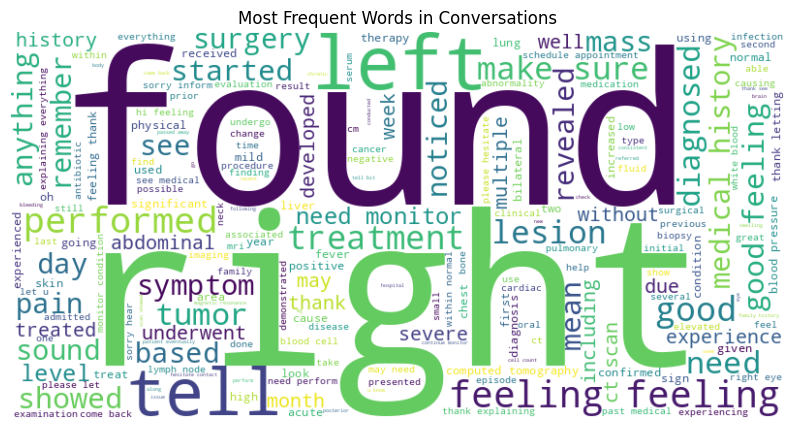

In [ ]:
# Word Cloud for Most Frequent Words in 'preprocessed_conversation'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['preprocessed_conversation'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

# **Exploratory Data Analysis (EDA)**

In [ ]:
df[['data', 'conversation', 'preprocessed_data', 'preprocessed_conversation']].describe()

,data,conversation,preprocessed_data,preprocessed_conversation
count,1000,1000,1000,1000
unique,1000,1000,1000,1000
top,"A 51-year-old male was diagnosed with muscle-invasive urothelial cell carcinoma in May 2015. Standard neoadjuvant chemotherapy was given followed by radical cystoprostatectomy. Final pathology showed pT3 N0 M0, stage III disease. He remained disease free until April 2016, at which point he developed new exertional dyspnea and a small lung nodule was noted on imaging. During cardiac clearance for a biopsy, a Mobitz 2 heart block with bradycardia was noted. Transthoracic echocardiogram (ECG) demonstrated a mass in the right ventricular outflow tract, which was additionally found to be fluorodeoxyglucose (FDG)-avid on positron emission tomography (PET) computed tomography (CT) (Figure , upper panel).\nThe patient developed progressive dyspnea with minimal exertion and then experienced a syncopal episode prompting hospitalization. Biopsy of the right ventricular mass demonstrated poorly differentiated carcinoma, consistent with urothelial origin (Figure ).\nThe mass was not felt to be respectable and chemotherapy was not felt to offer rapid disease control in the setting of progressive symptoms. He was offered palliative radiotherapy. His bradycardia progressed to a complete heart block, likely due to the growth of the mass, necessitating placement of a dual chamber pacemaker. The right ventricle mass was treated with 45 Gy in 18 fractions (3D conformal photons for 5 fractions, followed by intensity-modulated radiotherapy for the remaining 13 fractions (to reduce dose to the left ventricle). Figure demonstrates the dose distribution.\nProton radiation was considered to spare the uninvolved myocardium. He had substantial tumor thromboembolic disease to his lungs during radiotherapy, requiring medical intensive care unit (MICU) admission for symptom management. He ultimately completed the full course of radiotherapy which improved his functional status.\nFollowing radiotherapy, he began immune checkpoint therapy with the PD-L1 antagonist atezolizumab (1200 mg every three weeks), which was well tolerated. A PET/CT scan seven months after completing radiation demonstrated a complete metabolic response in the right ventricle mass and no","Doctor: Hi, how are you feeling today?\nPatient: I'm okay, thanks. \nDoctor: I see from your medical history that you were diagnosed with muscle-invasive urothelial cell carcinoma in May 2015. \nPatient: Yes, that's correct. \nDoctor: I see that you underwent standard neoadjuvant chemotherapy followed by radical cystoprostatectomy. \nPatient: Yes, that's right. \nDoctor: And the final pathology showed pT3 N0 M0, stage III disease. \nPatient: Yes, that's what I was told. \nDoctor: You remained disease-free until April 2016, but then you developed new exertional dyspnea and a small lung nodule was noted on imaging. \nPatient: Yes, that's when everything started to go downhill. \nDoctor: During cardiac clearance for a biopsy, a Mobitz 2 heart block with bradycardia was noted. \nPatient: Yes, that's right. \nDoctor: The Transthoracic echocardiogram (ECG) demonstrated a mass in the right ventricular outflow tract, which was additionally found to be fluorodeoxyglucose (FDG)-avid on positron emission tomography (PET) computed tomography (CT). \nPatient: I remember that. \nDoctor: The biopsy of the right ventricular mass demonstrated poorly differentiated carcinoma, consistent with urothelial origin. \nPatient: Yes, that's what I was told. \nDoctor: The mass was not felt to be respectable, and chemotherapy was not felt to offer rapid disease control in the setting of progressive symptoms. \nPatient: I see. \nDoctor: We offered palliative radiotherapy instead. \nPatient: Okay. \nDoctor: Your bradycardia progressed to a complete heart block, likely due to the growth of the mass, necessitating placement of a dual chamber pacemaker. \nPatient: Yes, I remember that. \nDoctor: The right ventricle

In [ ]:
df[['data', 'conversation','preprocessed_data', 'preprocessed_conversation']].dtypes

,0
data,object
conversation,object
preprocessed_data,object
preprocessed_conversation,object


In [ ]:
df[['data', 'conversation', 'preprocessed_data', 'preprocessed_conversation']].isna().sum()

,0
data,0
conversation,0
preprocessed_data,0
preprocessed_conversation,0


In [ ]:
#!pip install wordcloud nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


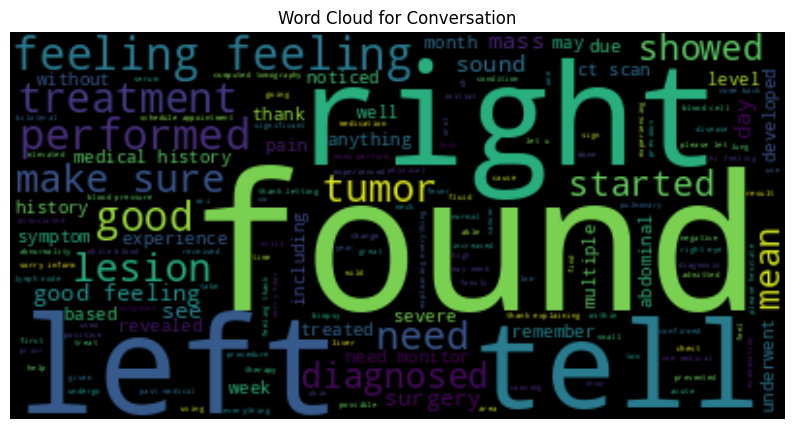

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

text = ' '.join(df['preprocessed_conversation'].dropna())
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear") #displays the word cloud as an image.
plt.title('Word Cloud for Conversation')
plt.axis('off')
plt.show()

#to easily spot the most frequent words, understanding key themes and topics
#identifying recurring words/patterns to check for further processing.

# **Sentiment Analysis using TextBlob**

1117    False
326     False
1165    False
1126    False
767     False
        ...  
3231    False
598      True
2435    False
2656    False
2330    False
Name: sentiment, Length: 1000, dtype: bool
Series([], Name: sentiment, dtype: bool)


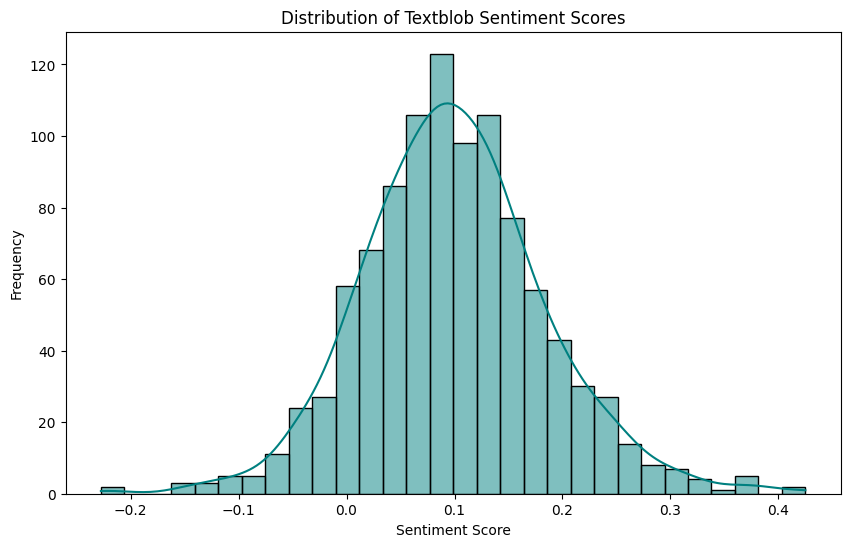

In [ ]:
#!pip install textblob
import textblob as tb
import pandas as pd


def get_sentiment(text):
    text_Sentiment = tb.TextBlob(str(text)).polarity
    text_subjectivity = tb.TextBlob(str(text)).subjectivity
    return text_Sentiment, text_subjectivity

# Apply to the preprocessed column and create new columns for sentiment and subjectivity
df[['sentiment', 'subjectivity']] = df['preprocessed_conversation'].apply(get_sentiment).apply(pd.Series)

#print(df[['preprocessed_conversation', 'sentiment', 'subjectivity']].iloc[12])

print(df.loc[df['sentiment']<=3,'sentiment'] == 0)

print(df.loc[df['sentiment']>3,'sentiment'] == 1)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='teal')
plt.title('Distribution of Textblob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# **Sentiment Analysis using Vader**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


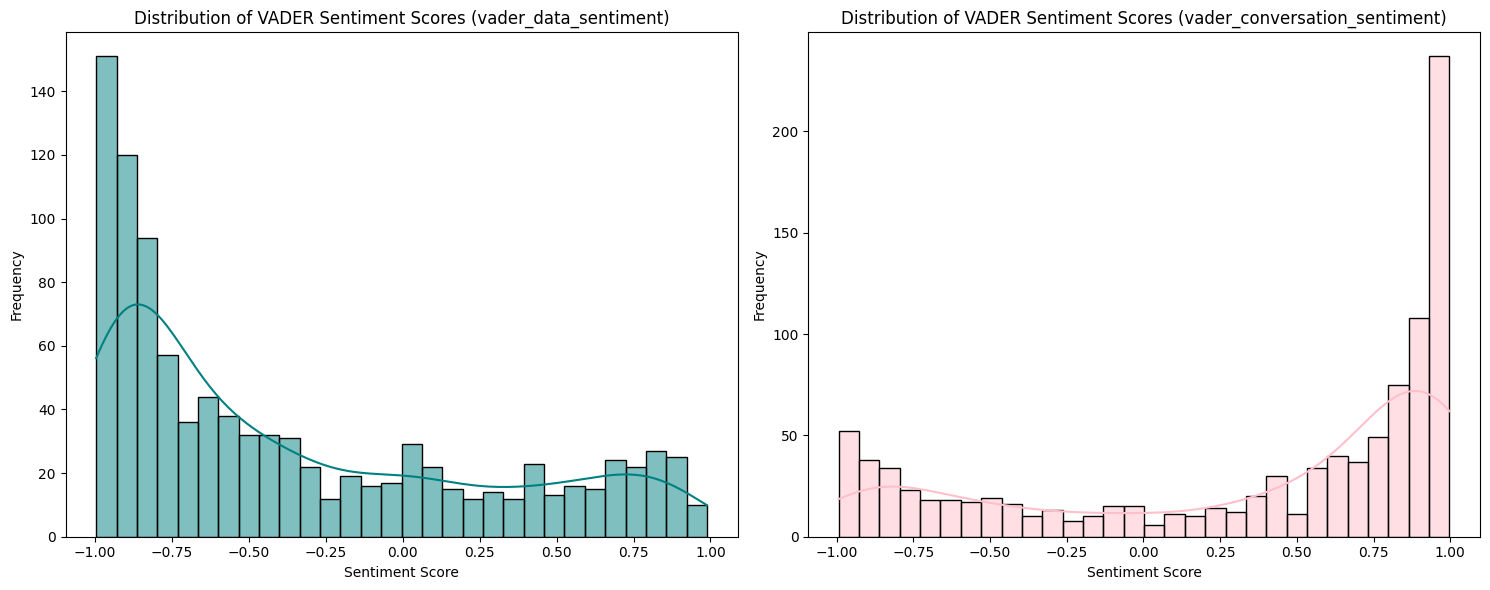

In [ ]:
#!pip install nltk

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

df['vader_data_sentiment'] = df['preprocessed_data'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

df['vader_conversation_sentiment'] = df['preprocessed_conversation'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Display the results
#print(df[['preprocessed_conversation', 'vader_sentiment']].head())

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['vader_data_sentiment'], bins=30, kde=True, color='teal', ax=axes[0])
axes[0].set_title('Distribution of VADER Sentiment Scores (vader_data_sentiment)')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df['vader_conversation_sentiment'], bins=30, kde=True, color='pink', ax=axes[1])
axes[1].set_title('Distribution of VADER Sentiment Scores (vader_conversation_sentiment)')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Sentiment data Distribution:
 predicted_data_sentiment
Negative    712
Positive    252
Neutral      36
Name: count, dtype: int64
Sentiment conversation Distribution:
 predicted_conversation_sentiment
Positive    689
Negative    296
Neutral      15
Name: count, dtype: int64


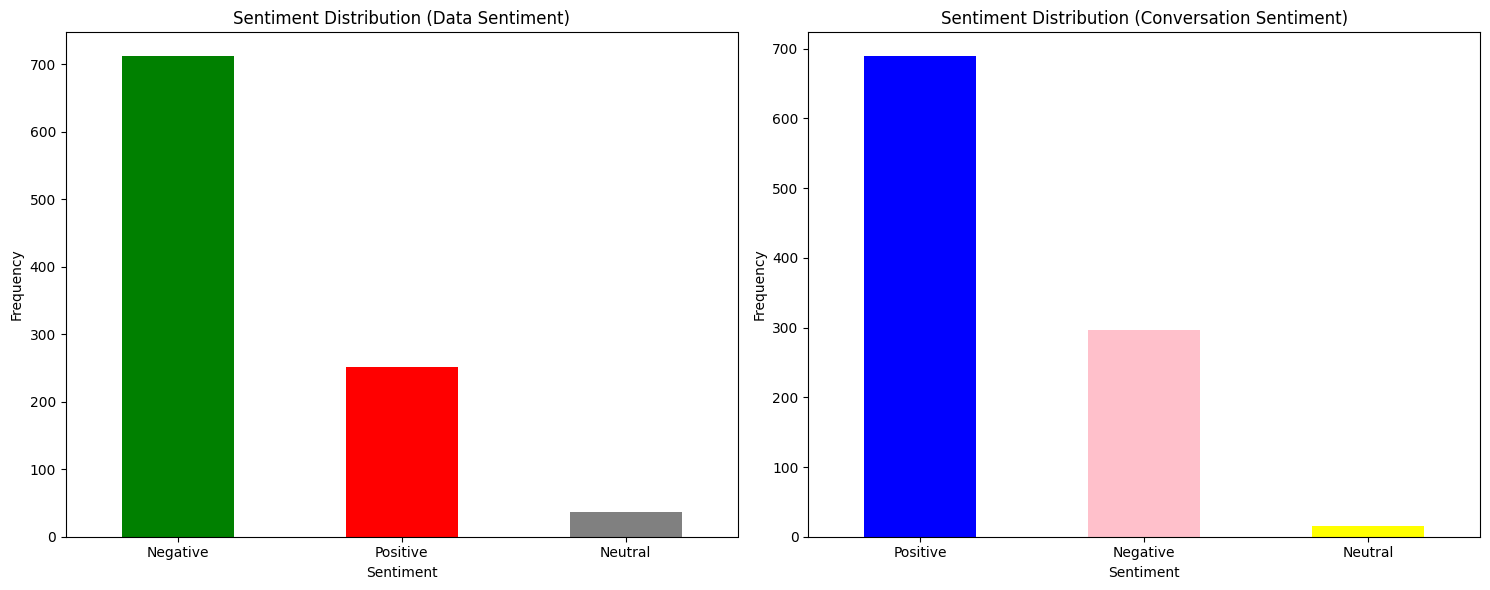

In [ ]:
from sklearn.metrics import classification_report

#VADER scores to sentiment labels
def sentiment_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['predicted_data_sentiment'] = df['vader_data_sentiment'].apply(sentiment_label)
df['predicted_conversation_sentiment'] = df['vader_conversation_sentiment'].apply(sentiment_label)

sentiment_data_distribution = df['predicted_data_sentiment'].value_counts()
sentiment_conversation_distribution = df['predicted_conversation_sentiment'].value_counts()

print("Sentiment data Distribution:\n", sentiment_data_distribution)
print("Sentiment conversation Distribution:\n", sentiment_conversation_distribution)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sentiment_data_distribution.plot(kind='bar', color=['green', 'red', 'gray'], ax=axes[0])
axes[0].set_title('Sentiment Distribution (Data Sentiment)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

sentiment_conversation_distribution.plot(kind='bar', color=['blue', 'pink', 'yellow'], ax=axes[1])
axes[1].set_title('Sentiment Distribution (Conversation Sentiment)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

#print(df[['preprocessed_conversation', 'vader_sentiment', 'predicted_sentiment']].head())


Most Common Words:
         Word  Frequency
0        also       1457
1        need       1453
2     feeling       1346
3       right       1079
4       thank       1015
5      showed        922
6        left        903
7       found        878
8        tell        870
9       blood        804
10       good        799
11        see        793
12       test        743
13    medical        736
14  treatment        666
15    symptom        636
16    history        622
17       pain        606
18       mean        529
19    monitor        475


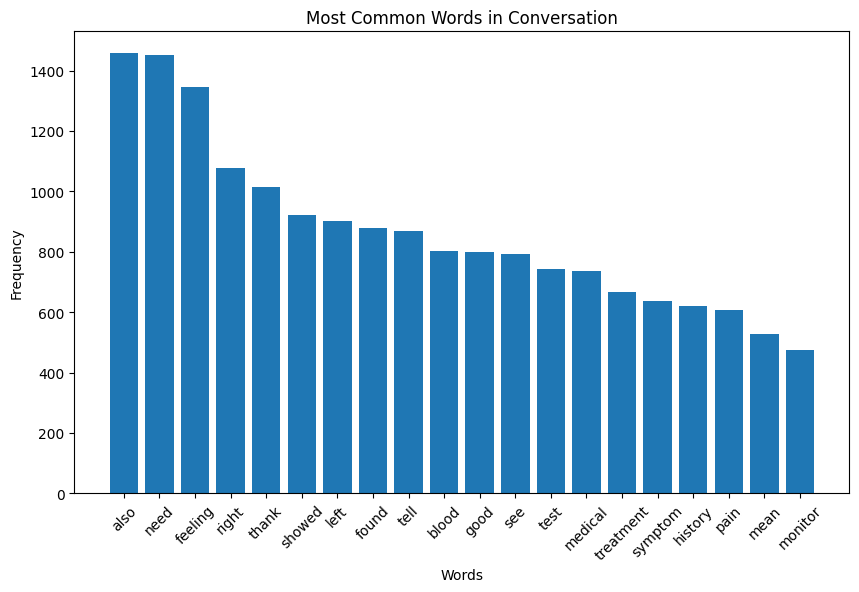

In [ ]:
from collections import Counter

# Flattening the list of keywords from all rows into a single list
all_keywords = [word for sublist in df['preprocessed_conversation'].dropna() for word in sublist.split()]

# Count the frequency of each word using Counter
counter = Counter(all_keywords)

most_common_words = counter.most_common(20)

most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(f"Most Common Words:\n{most_common_df}")

plt.figure(figsize=(10, 6))
plt.bar(most_common_df['Word'], most_common_df['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Most Common Words in Conversation')
plt.show()

In [ ]:
def extract_age(text):
    match = re.search(r'\b(\d{1,3})[- ]?year[- ]?old\b', text.lower())
    return int(match.group(1)) if match else None

df['age'] = df['data'].apply(extract_age)
print(df['age'])

1117    51.0
326     81.0
1165     8.0
1126    34.0
767     57.0
        ... 
3231    83.0
598     41.0
2435    55.0
2656    40.0
2330    41.0
Name: age, Length: 1000, dtype: float64


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **FAQ problem statement**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Function to split conversation into sentences and identify questions
def extract_questions(conversation):
    sentences = sent_tokenize(conversation)
    questions = [sentence for sentence in sentences if sentence.endswith('?')]
    return questions

# Apply the function to extract questions from each conversation
df['questions'] = df['conversation'].apply(extract_questions)

# Flatten the list of questions and create a new DataFrame
all_questions = [question for questions in df['questions'] for question in questions]
questions_df = pd.DataFrame(all_questions, columns=['Frequently Asked Question'])

# Count the frequency of each unique question
faq_counts = questions_df['Frequently Asked Question'].value_counts().reset_index()
faq_counts.columns = ['Frequently Asked Question', 'Frequency']

print("Top 10 Frequently Asked Questions:")
print(faq_counts.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Frequently Asked Questions:
                             Frequently Asked Question  Frequency
0            Doctor: Hello, how are you feeling today?        317
1                        Patient: What does that mean?        256
2                                     Is that correct?        206
3     Doctor: Good morning, how are you feeling today?        145
4                     Can you tell me more about that?        144
5                           How are you feeling today?         87
6         Doctor: Hi there, how are you feeling today?         85
7            Can you tell me more about your symptoms?         59
8                                Do you remember that?         55
9                    Do you have any questions for me?         52
10            Doctor: Hello, how can I help you today?         51
11              Doctor: Hi, how are you feeling today?         50
12  Doctor: Good afternoon, how are you feeling today?         47
13                 Patient: Okay, what do

In [ ]:
import re

def clean_question(question):
    # Remove doctor/patient prefixes
    question = re.sub(r'(Doctor:|Patient:)', '', question).strip()
    # Remove simple greetings questions
    common_phrases = [
        "how are you feeling today",
        "what does that mean",
        "is that correct",
        "do you have any questions for me",
        "can you tell me more about that"
    ]

    if not any(phrase in question.lower() for phrase in common_phrases):
        return question
    return None

questions_df['Cleaned Question'] = questions_df['Frequently Asked Question'].apply(clean_question)
questions_df = questions_df.dropna(subset=['Cleaned Question'])

cleaned_faq_counts = questions_df['Cleaned Question'].value_counts().reset_index()
cleaned_faq_counts.columns = ['Frequently Asked Question', 'Frequency']

print("Top 10 Frequently Asked Questions:")
print(cleaned_faq_counts.head(20))


Top 10 Frequently Asked Questions:
                            Frequently Asked Question  Frequency
0           Can you tell me more about your symptoms?         72
1                               Do you remember that?         55
2                    Hello, how can I help you today?         51
3             Good morning, how can I help you today?         36
4                                      Is that right?         32
5              Do you have any questions or concerns?         31
6    Can you tell me more about your medical history?         25
7                  Do you understand what that means?         21
8           Good afternoon, how can I help you today?         19
9                                    How did that go?         19
10                        What does all of that mean?         18
11  Can you tell me a bit about your medical history?         18
12                                       What's that?         17
13                              What's the next step?  

# Chatbot

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import pandas as pd

auth.authenticate_user()

In [ ]:
!pip install gspread pandas

from google.colab import auth
from google.auth import default

auth.authenticate_user()
creds, _ = default()

In [ ]:
import gspread

# Authenticate and access the spreadsheet
gc = gspread.authorize(creds)

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1kOTpKF5z2QpvvhP-UsrBmVKqBfCxUrgRHlvPlCKxEos/edit?gid=1943948906#gid=1943948906"
spreadsheet = gc.open_by_url(spreadsheet_url)

# Selecting the first sheet
sheet = spreadsheet.sheet1

# Fetching data as a DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Display the data
print(data.head())

                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                                        conversation  
0  Doctor: Good morning, how are you feeling toda...  
1  Doctor: Hello, how are you feeling today?\nPat...  
2  Doctor: Hello, how are you feeling today?\nPat...  
3  Doctor: Hello, how are you feeling today?\nPat...  
4  Doctor: Good morning, how are you feeling toda...  


In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')  # This line downloads the necessary data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Predefined stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove special characters
        text = re.sub(r'[^a-zA-Z0-9\s-]+', '', text)
        # Remove stopwords
        text = " ".join([word for word in text.split() if word.lower() not in stop_words])
        # Remove additional spaces
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to both columns
columns_to_process = ['data', 'conversation']
for column in columns_to_process:
    data[f'processed_{column}'] = data[column].apply(preprocess_text)

In [ ]:
data.head()

,data,conversation,processed_data,processed_conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda...",60-year-old male hospitalized due moderate ARD...,Doctor Good morning feeling today Patient Im f...
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat...",39-year-old man hospitalized due increasingly ...,Doctor Hello feeling today Patient great Ive h...
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat...",One week positive COVID-19 result 57-year-old ...,Doctor Hello feeling today Patient great Ive t...
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat...",69-year-old male admitted ICU dry cough 2 week...,Doctor Hello feeling today Patient good doctor...
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda...",57-year-old male admitted ICU dyspnea heavy dr...,Doctor Good morning feeling today Patient good...


In [ ]:
data = data.drop(columns=['data', 'conversation'])

In [ ]:
# Check for duplicates in the dataset
duplicates_count = data.duplicated().sum()

# Analyze text length for both columns
data['data_length'] = data['processed_data'].apply(len)
data['conversation_length'] = data['processed_conversation'].apply(len)

# Summary statistics for text lengths
data_length_stats = data[['data_length', 'conversation_length']].describe()

# Result
duplicates_count, data_length_stats

(0,
        data_length  conversation_length
 count  3377.000000          3377.000000
 mean   1321.828546          1595.839799
 std     323.309557           361.226007
 min     111.000000           157.000000
 25%    1239.000000          1331.000000
 50%    1420.000000          1591.000000
 75%    1530.000000          1849.000000
 max    1860.000000          3071.000000)

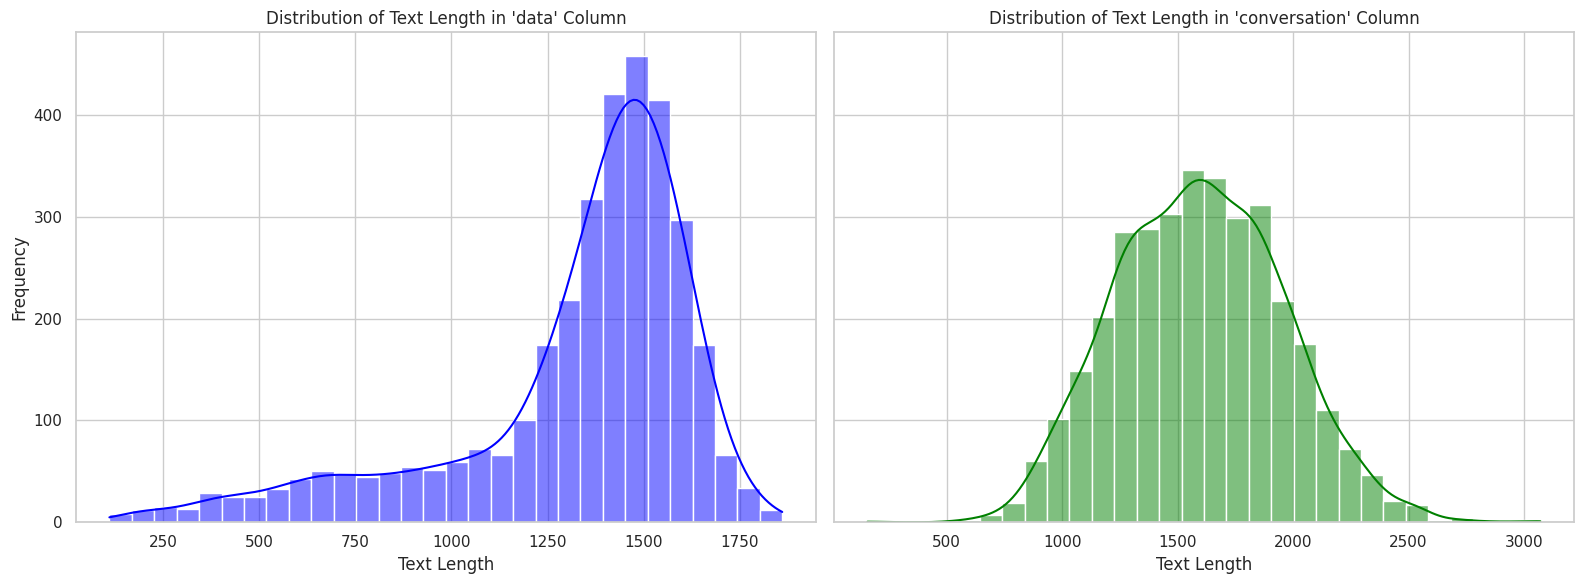

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot histograms for text length distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.histplot(data['data_length'], bins=30, kde=True, ax=axes[0], color='blue')
sns.histplot(data['conversation_length'], bins=30, kde=True, ax=axes[1], color='green')

# Customize plots
axes[0].set_title("Distribution of Text Length in 'data' Column")
axes[0].set_xlabel("Text Length")
axes[0].set_ylabel("Frequency")

axes[1].set_title("Distribution of Text Length in 'conversation' Column")
axes[1].set_xlabel("Text Length")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF on 'data' column
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_data'])
keywords = tfidf_vectorizer.get_feature_names_out()

print("Top Keywords in 'data' Column:")
print(keywords)

Top Keywords in 'data' Column:
['blood' 'cm' 'ct' 'examination' 'fig' 'history' 'left' 'mass' 'months'
 'normal' 'old' 'pain' 'patient' 'performed' 'presented' 'revealed'
 'right' 'showed' 'year' 'years']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF on 'data' column
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_conversation'])
keywords = tfidf_vectorizer.get_feature_names_out()

print("Top Keywords in 'data' Column:")
print(keywords)

Top Keywords in 'data' Column:
['blood' 'doctor' 'feeling' 'good' 'history' 'im' 'left' 'need' 'okay'
 'pain' 'patient' 'right' 'showed' 'symptoms' 'tell' 'thank' 'thats'
 'today' 'treatment' 'yes']


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
data['data_sentiment'] = data['processed_data'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(data[['processed_data', 'data_sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                      processed_data  data_sentiment
0  60-year-old male hospitalized due moderate ARD...         -0.2481
1  39-year-old man hospitalized due increasingly ...          0.1779
2  One week positive COVID-19 result 57-year-old ...          0.7506
3  69-year-old male admitted ICU dry cough 2 week...         -0.3818
4  57-year-old male admitted ICU dyspnea heavy dr...          0.5916


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
data['conversation_sentiment'] = data['processed_conversation'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(data[['processed_conversation', 'conversation_sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                              processed_conversation  conversation_sentiment
0  Doctor Good morning feeling today Patient Im f...                  0.9881
1  Doctor Hello feeling today Patient great Ive h...                  0.9903
2  Doctor Hello feeling today Patient great Ive t...                  0.9908
3  Doctor Hello feeling today Patient good doctor...                  0.9827
4  Doctor Good morning feeling today Patient good...                  0.9897


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count bi-grams in 'conversation'
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(data['processed_conversation'])
bigram_counts = bigram_matrix.sum(axis=0)

bigram_freq = [(bigram, bigram_counts[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

print("Top 10 Bi-Grams:")
print(bigram_freq[:10])

Top 10 Bi-Grams:
[('patient yes', 8486), ('patient okay', 4355), ('doctor okay', 3398), ('today patient', 3196), ('yes thats', 2561), ('feeling today', 2544), ('okay doctor', 1913), ('patient im', 1887), ('mean doctor', 1685), ('medical history', 1608)]


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize 'data' column for LDA
count_vectorizer = CountVectorizer(max_features=500, stop_words='english')
data_vectorized = count_vectorizer.fit_transform(data['processed_data'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(data_vectorized)

# Display Topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['days', 'revealed', 'showed', 'mgdl', 'old', 'year', 'history', 'blood', 'normal', 'patient']
Topic 2:
['rate', 'pressure', 'showed', 'history', 'blood', 'eye', 'chest', 'right', 'left', 'patient']
Topic 3:
['examination', 'year', 'old', 'right', 'revealed', 'mass', 'performed', 'cm', 'abdominal', 'patient']
Topic 4:
['imaging', 'examination', 'old', 'year', 'showed', 'mri', 'pain', 'patient', 'right', 'left']
Topic 5:
['year', 'lesion', 'left', 'fig', 'mass', 'right', 'revealed', 'patient', 'showed', 'tumor']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize 'data' column for LDA
count_vectorizer = CountVectorizer(max_features=500, stop_words='english')
data_vectorized = count_vectorizer.fit_transform(data['processed_conversation'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(data_vectorized)

# Display Topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['pain', 'im', 'feeling', 'okay', 'right', 'correct', 'thats', 'yes', 'patient', 'doctor']
Topic 2:
['thank', 'tests', 'feeling', 'im', 'yes', 'need', 'symptoms', 'okay', 'patient', 'doctor']
Topic 3:
['treatment', 'ct', 'yes', 'cancer', 'mass', 'showed', 'okay', 'tumor', 'patient', 'doctor']
Topic 4:
['right', 'heart', 'okay', 'left', 'yes', 'showed', 'chest', 'blood', 'patient', 'doctor']
Topic 5:
['thank', 'examination', 'surgery', 'eye', 'right', 'left', 'need', 'okay', 'patient', 'doctor']


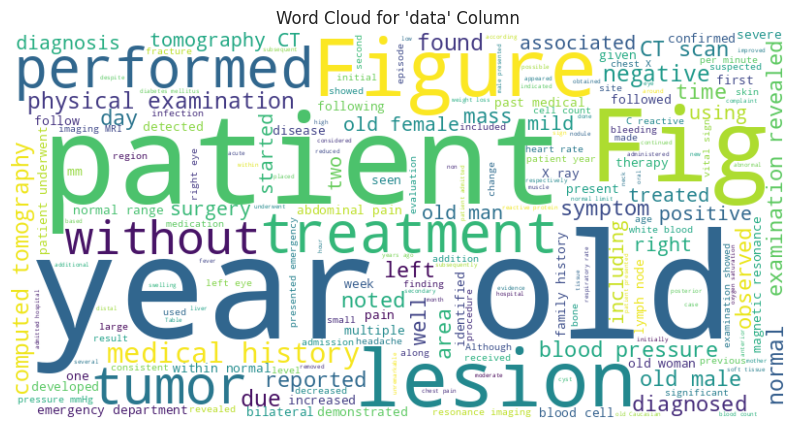

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
text = " ".join(data['processed_data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 'data' Column")
plt.show()

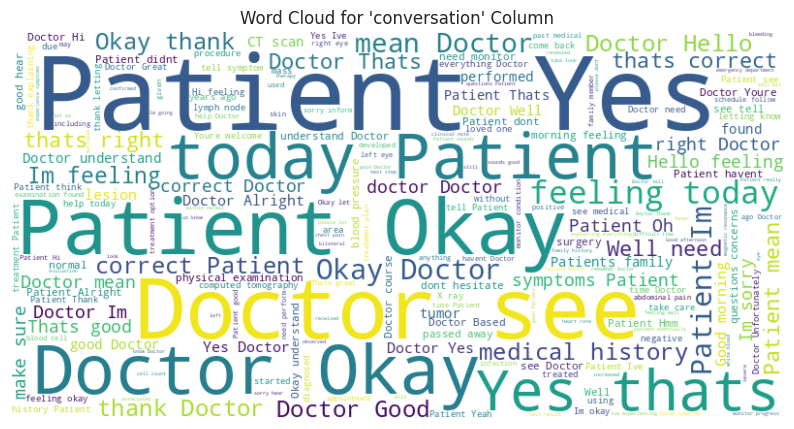

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
text = " ".join(data['processed_conversation'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 'conversation' Column")
plt.show()

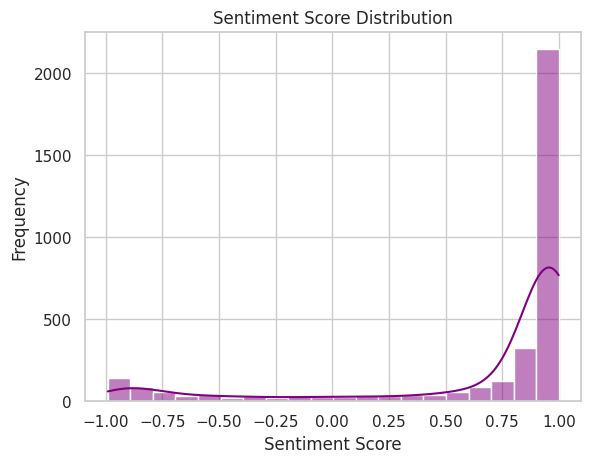

In [ ]:
sns.histplot(data['conversation_sentiment'], bins=20, kde=True, color='purple')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

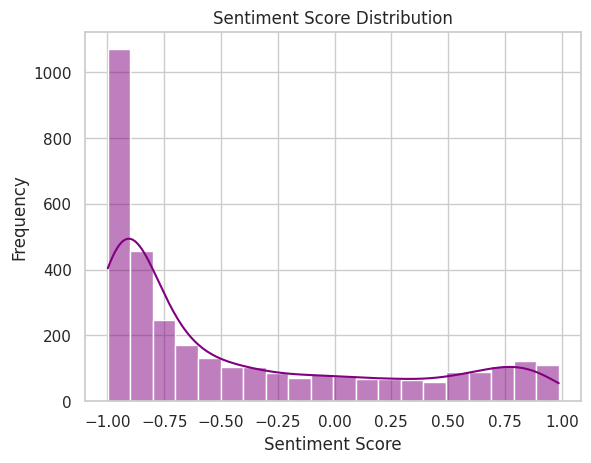

In [ ]:
sns.histplot(data['data_sentiment'], bins=20, kde=True, color='purple')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import pandas as pd
import spacy
from nltk.stem import PorterStemmer

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Initialize NLTK's PorterStemmer
stemmer = PorterStemmer()

# Function to preprocess text: tokenization, stemming, and lemmatization
def preprocess_text_spacy(text, use_stemming=True, use_lemmatization=True):
    if not isinstance(text, str):  # Return text as-is if it's not a string
        return text

    # Tokenize using SpaCy
    doc = nlp(text)

    # Stemming and Lemmatization
    tokens = []
    for token in doc:
        if token.is_alpha:  # Consider only alphabetic tokens
            if use_stemming and use_lemmatization:
                # Perform both stemming and lemmatization
                stemmed = stemmer.stem(token.text)
                lemma = token.lemma_
                tokens.append(f"{stemmed}|{lemma}")
            elif use_stemming:
                # Only perform stemming
                tokens.append(stemmer.stem(token.text))
            elif use_lemmatization:
                # Only perform lemmatization
                tokens.append(token.lemma_)
            else:
                tokens.append(token.text)
    return " ".join(tokens)

# Apply the function to both columns and save in new columns
data['tokenized_stemmed_lemmatized_data'] = data['processed_data'].apply(
    lambda x: preprocess_text_spacy(x, use_stemming=True, use_lemmatization=True)
)
data['tokenized_stemmed_lemmatized_conversation'] = data['processed_conversation'].apply(
    lambda x: preprocess_text_spacy(x, use_stemming=True, use_lemmatization=True)
)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the input and response columns
inputs = data['processed_data']
responses = data['processed_conversation']

# Encode responses
response_embeddings = model.encode(responses, convert_to_tensor=True)

# Function to retrieve the best response
def get_response(user_input):
    query_embedding = model.encode(user_input, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, response_embeddings)
    best_match_idx = scores.argmax().item()
    return responses.iloc[best_match_idx]

# Example queries
print(get_response('Tell me about COVID19 patients?'))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Doctor Hi feeling today Patient Im feeling well doctor high fever pain abdomen Doctor Okay tell symptoms experiencing vomiting diarrhea Patient Yes vomiting diarrhea past two days Doctor noticed blood vomit stool Patient Yes two episodes melena hematemesis Doctor see contact COVID-19 positive patient recently Patient Yes contact positive patient month ago didnt symptoms Doctor Okay see Based symptoms history possible dengue fever need tests confirm Patient Okay kind tests Doctor need check blood pressure platelet count lab tests check signs infection may also need chest x-ray echocardiogram check heart lungs Patient Alright treatment need Doctor dengue fever need give fluids inotropes help plasma leakage also give furosemide help swelling levofloxacin treat infections need receive oxygen via face mask help breathing Patient Okay thank doctor Doctor also need monitor platelet count lab values closely make sure youre improving need may need give blood transfusion Patient chances recovery

In [ ]:
get_response('What are the symptoms of COVID19 patient?')

'Doctor Good afternoon help today Patient Hi doctor Ive experiencing persistent forehead swelling past two months Doctor Could tell little bit past medical history medical conditions medications youre taking Patient Yes hypertension recently recovered COVID-19 infection took dexamethasone Doctor see take antibiotics time Patient Yes Im sure names courses Doctor Okay thank Based symptoms possible may developed sinusitis Well need evaluation confirm Patient Alright kind evaluation need Doctor Well need CT scan head see whats going Depending results may need start course antibiotics Patient Okay sounds good possible side effects antibiotics Doctor common side effects nausea diarrhea stomach pain However important take full course antibiotics prescribed ensure infection fully treated Patient Understood happens antibiotics dont work Doctor antibiotics dont work may need consider surgery remove infected tissue However well cross bridge come Patient Alright thank explaining everything Doctor 

In [ ]:
get_response("Can you tell me about fever?")


'Doctor Hello feeling today Patient Im feeling well Ive fever Doctor see referred us evaluation fever unknown origin tell fever started high got Patient started week ago got 40C Doctor experienced symptoms coughing vomiting diarrhea Patient havent symptoms Doctor Okay see previous doctor treated first-generation cephalosporin didnt lead reduction fever correct Patient Yes thats right Doctor noticed skin rashes weight loss Patient havent noticed anything like Doctor Alright Well need physical examination get information noticed abnormalities body Patient Ive feeling pale febrile Doctor Okay see physical examination noted splenomegaly confirmed ultrasound showed spleen size 99 cm Thats larger normal age Patient Oh didnt know Doctor also found abnormalities blood tests haemoglobin level 75 gl platelet count 50 109l also noticed 175 suspected atypical cells C-reactive protein level 73 mgl erythrocyte sedimentation rate 47 mmh liver function tests abnormal aspartate aminotransferase ASAT 14